<a href="https://colab.research.google.com/github/MarianaMayumeCaniza/SleepTrack-Analytics/blob/main/Projeto_aplicado_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# 2.Ler direto do GitHub
url = 'https://raw.githubusercontent.com/MarianaMayumeCaniza/SleepTrack-Analytics/main/Base%20de%20dados/sleep_cycle_productivity.csv'


df = pd.read_csv(url)

# Mostrar as primeiras linhas para confirmar
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [ ]:
# 3. Criar a variável binária de classificação
df['BoaQualidadeSono'] = (df['Sleep Quality'] > 6).astype(int)

In [ ]:
# 4. Selecionar variáveis preditoras
X = df.drop(columns=['Date', 'Person_ID', 'Sleep Quality', 'BoaQualidadeSono'])
y = df['BoaQualidadeSono']

In [ ]:
# 5. Fazer o tratamento de todas as variáveis categóricas (não só Gender)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# 6. Separar em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 7. Criar e treinar o modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# 8. Fazer previsões
y_pred = modelo.predict(X_test)

In [ ]:
# 9. Calcular métricas
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# 10. Imprimir resultados
print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall (Sensibilidade): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

Acurácia: 0.51
Precisão: 0.51
Recall (Sensibilidade): 0.49
F1-Score: 0.50

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       745
           1       0.51      0.49      0.50       755

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500



In [ ]:
# 11. Curva ROC e AUC
y_prob = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


In [ ]:
# 13. Mostrar AUC
print(f"AUC: {roc_auc:.2f}")

AUC: 0.50


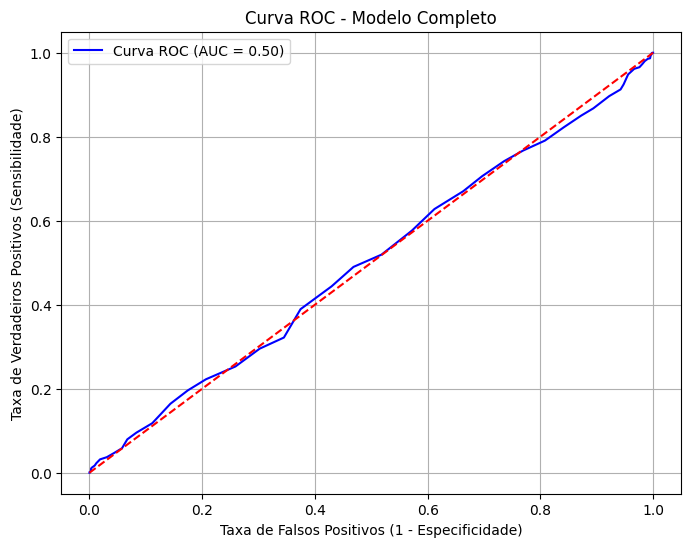

In [ ]:
 #12. Plotar a Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC - Modelo Completo')
plt.legend()
plt.grid(True)
plt.show()